# Preliminary Work

## 1. Let's download the libraries we'll be using

In [1]:
%pip install feature-engine
%pip install plotly
%pip install cufflinks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.1/364.1 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.3 MB/s eta 0:00:00


In [2]:
%pip install statsmodels

In [3]:
%pip install missingno

In [4]:
%pip install chart_studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 3.3 MB/s eta 0:00:00


In [7]:
%pip install pyampute

## 2. Let's import the libraries


libraries for data visualization

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import  plotly



import  plotly.graph_objs as go
import  plotly.io as pio
from plotly.subplots import make_subplots
import  plotly.express as px
from plotly.offline import iplot, init_notebook_mode
import  cufflinks as cf
import  plotly.figure_factory as ff
from plotly.offline import iplot
from plotly import tools
from ipywidgets import widgets

libraries for data analysis

In [9]:
from pyampute.exploration.md_patterns import mdPatterns
from pyampute.exploration.mcar_statistical_tests import MCARTest
import missingno as msno
#from statsmodels.imputation import missing as miss

In [10]:
import warnings

warnings.filterwarnings("ignore", message=".*cannot be placed.*")


In [11]:
plt.style.use('seaborn-darkgrid')


# set some display options:
plt.rcParams['figure.dpi'] = 100
colors = px.colors.qualitative.Prism
pio.templates.default = "plotly_white"
plotly.offline.init_notebook_mode(connected = True)

<ipython-input-11-c7d5731d5dee>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



## Let's import the data

In [12]:
column_names = [
        "Carbon concentration / (weight%)",
        "Silicon concentration / (weight%)",
        "Manganese concentration / (weight%)",
        "Sulphur concentration / (weight%)",
        "Phosphorus concentration / (weight%)",
        "Nickel concentration / (weight%)",
        "Chromium concentration / (weight%)",
        "Molybdenum concentration / (weight%)",
        "Vanadium concentration / (weight%)",
        "Copper concentration / (weight%)",
        "Cobalt concentration / (weight%)",
        "Tungsten concentration / (weight%)",
        "Oxygen concentration / parts per million by weight",
        "Titanium concentration / parts per million by weight",
        "Nitrogen concentration / parts per million by weight",
        "Aluminium concentration / parts per million by weight",
        "Boron concentration / parts per million by weight",
        "Niobium concentration / parts per million by weight",
        "Tin concentration / parts per million by weight",
        "Arsenic concentration / parts per million by weight",
        "Antimony concentration / parts per million by weight",
        "Current / A",
        "Voltage / V",
        "AC or DC",
        "Electrode positive or negative",
        "Heat input / kJmm-1",
        "Interpass temperature / °C",
        "Type of weld",
        "Post weld heat treatment temperature / °C",
        "Post weld heat treatment time / hours",
        "Yield strength / MPa",
        "Ultimate tensile strength / MPa",
        "Elongation / %",
        "Reduction of Area / %",
        "Charpy temperature / °C",
        "Charpy impact toughness / J",
        "Hardness / kgmm-2",
        "50 % FATT",
        "Primary ferrite in microstructure / %",
        "Ferrite with second phase / %",
        "Acicular ferrite / %",
        "Martensite / %",
        "Ferrite with carbide aggreagate / %",
        "Weld ID"
    ]

In [13]:
data = pd.read_csv("welddb/welddb.data", sep=" ", header=None, names=column_names)
data

,Carbon concentration / (weight%),Silicon concentration / (weight%),Manganese concentration / (weight%),Sulphur concentration / (weight%),Phosphorus concentration / (weight%),Nickel concentration / (weight%),Chromium concentration / (weight%),Molybdenum concentration / (weight%),Vanadium concentration / (weight%),Copper concentration / (weight%),...,Charpy temperature / °C,Charpy impact toughness / J,Hardness / kgmm-2,50 % FATT,Primary ferrite in microstructure / %,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggreagate / %,Weld ID
0,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aaw
1,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,-28,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aawch
2,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,-38,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aht
3,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Baw
4,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,-48,100,N,N,32,28,40,0,0,Evans-Ni/CMn-1990/1991-0Bawch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,0.100,0.35,0.90,0.008,0.016,0.60,8.6,0.98,0.18,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX35
1648,0.088,0.36,0.88,0.008,0.017,0.57,8.4,0.94,0.19,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX36
1649,0.090,0.34,0.89,0.008,0.016,0.17,8.2,0.94,0.02,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX37
1650,0.092,0.35,0.90,0.008,0.016,0.54,8.4,0.97,0.17,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX38


pandas couldn't identify some numerical features as numerical, so we will need to do this manually

In [14]:
data.select_dtypes(include=['number'])

,Carbon concentration / (weight%),Silicon concentration / (weight%),Manganese concentration / (weight%),Heat input / kJmm-1
0,0.037,0.30,0.65,1.0
1,0.037,0.30,0.65,1.0
2,0.037,0.30,0.65,1.0
3,0.037,0.31,1.03,1.0
4,0.037,0.31,1.03,1.0
...,...,...,...,...
1647,0.100,0.35,0.90,2.0
1648,0.088,0.36,0.88,2.0
1649,0.090,0.34,0.89,2.0
1650,0.092,0.35,0.90,2.0


Some columns are numerical, but have strings like <0.5, so we need to clean this

Also replace the N's by the NaN value of pandas

In [15]:
CATEGORICAL_FEATURES = [
        "Weld ID",
        "AC or DC",
        "Electrode positive or negative",
        "Type of weld",
    ]
NUMERICAL_FEATURES = [
        "Carbon concentration / (weight%)",
        "Silicon concentration / (weight%)",
        "Manganese concentration / (weight%)",
        "Sulphur concentration / (weight%)",
        "Phosphorus concentration / (weight%)",
        "Nickel concentration / (weight%)",
        "Chromium concentration / (weight%)",
        "Molybdenum concentration / (weight%)",
        "Vanadium concentration / (weight%)",
        "Copper concentration / (weight%)",
        "Cobalt concentration / (weight%)",
        "Tungsten concentration / (weight%)",
        "Oxygen concentration / parts per million by weight",
        "Titanium concentration / parts per million by weight",
        "Nitrogen concentration / parts per million by weight",
        "Aluminium concentration / parts per million by weight",
        "Boron concentration / parts per million by weight",
        "Niobium concentration / parts per million by weight",
        "Tin concentration / parts per million by weight",
        "Arsenic concentration / parts per million by weight",
        "Antimony concentration / parts per million by weight",
        "Current / A",
        "Voltage / V",
        "Heat input / kJmm-1",
        "Interpass temperature / °C",
        "Post weld heat treatment temperature / °C",
        "Post weld heat treatment time / hours",
        "Yield strength / MPa",
        "Ultimate tensile strength / MPa",
        "Elongation / %",
        "Reduction of Area / %",
        "Charpy temperature / °C",
        "Charpy impact toughness / J",
        "Hardness / kgmm-2",
        "50 % FATT",
        "Primary ferrite in microstructure / %",
        "Ferrite with second phase / %",
        "Acicular ferrite / %",
        "Martensite / %",
        "Ferrite with carbide aggreagate / %"
    ]

In [16]:
assert(len(NUMERICAL_FEATURES) + len(CATEGORICAL_FEATURES) == len(column_names))

In [17]:
def clean_dataframe(df):
    df = df.replace("N", np.nan)
    df = df.applymap(lambda x: str(x).replace('<', ''))
    df[NUMERICAL_FEATURES] = df[NUMERICAL_FEATURES].apply(pd.to_numeric, errors='coerce')
    return df

In [18]:
data = clean_dataframe(data)

<ipython-input-17-4987167822c9>:3: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



For the Weld ID column, although has a unique value for each row, we can extract some information from it, since they belong to some groups

In [19]:
group_ids = ["Evans-Ni/CMn-1990", "Es-Souni&-Cu/CMn", "Evans-AlTi-1994-5", "Evans-AlTi-1994",
             "Evans-B/9Cr1Mo-1994", "Evans-Cr/CMn-1989", "Evans-Al/CMn-1990",
             "Evans-V/Mn-1991", "Evans-Nb/Mn-1991", "Evans-FelowH-1991", "Evans-StressRelief-1991",
             "Evans-Ti/CMn-1992", "Evans-Ti/Mn-1992", "KocakPREv-TiN", "Evans-Mn-1977", "SurianEtAl-C-1991",
             "Alekseev&-CMnNi-1991", "Evans-AlEl9Cr1Mo", "RaiterGonzal-Mo-1989", "SvenGret-1990",
             "PakSven-1990", "JorgeEtAl-1993", "Hunt&-Di-1994", "Kluket-CuMnB-1994", "Cunh-1982", "Pat-1981", "Wats-1981",
             "EvHtIp1979", "Stil-TiB-1978", "Evans-intpss-1978", "Gar&K-1975-25mm", "Gar&K-1975-12mm", "Ga&K-1975II",
             "PantK-1990", "EPRI-TR-101394s", "Chandel&-19", "Icici&-1992", "Blond&-1984", "Natsume-1990",
             "Mart", "Sw&Rog", "Kik", "Wolst-1974", "Ditt-", "Inag&-1966", "RR82011", "RC81033",
             "EvansLetterC", "Birmingham"]

def substitute_values(id_string, subs_list):
    for val in subs_list:
        if val in id_string:
            return val

In [20]:
data['Weld ID'] = data['Weld ID'].apply(substitute_values, subs_list=group_ids)

Let's now understand the meaning of each column:

### Weld Data Field Descriptions

| Variable                                           | Type          | Description                                                                                    |
|----------------------------------------------------|---------------|------------------------------------------------------------------------------------------------|
| Carbon concentration / (weight%)                   | Double        | Concentration of Carbon in weight percentage                                                   |
| Silicon concentration / (weight%)                  | Double        | Concentration of Silicon in weight percentage                                                  |
| Manganese concentration / (weight%)                | Double        | Concentration of Manganese in weight percentage                                                |
| Sulphur concentration / (weight%)                  | Double        | Concentration of Sulphur in weight percentage                                                  |
| Phosphorus concentration / (weight%)               | Double        | Concentration of Phosphorus in weight percentage                                               |
| Nickel concentration / (weight%)                   | Double        | Concentration of Nickel in weight percentage                                                   |
| Chromium concentration / (weight%)                 | Double        | Concentration of Chromium in weight percentage                                                 |
| Molybdenum concentration / (weight%)               | Double        | Concentration of Molybdenum in weight percentage                                               |
| Vanadium concentration / (weight%)                 | Double        | Concentration of Vanadium in weight percentage                                                 |
| Copper concentration / (weight%)                   | Double        | Concentration of Copper in weight percentage                                                   |
| Cobalt concentration / (weight%)                   | Double        | Concentration of Cobalt in weight percentage                                                   |
| Tungsten concentration / (weight%)                 | Double        | Concentration of Tungsten in weight percentage                                                 |
| Oxygen concentration / (ppm)                       | Integer       | Concentration of Oxygen in parts per million by weight                                         |
| Titanium concentration / (ppm)                     | Integer       | Concentration of Titanium in parts per million by weight                                       |
| Nitrogen concentration / (ppm)                     | Integer       | Concentration of Nitrogen in parts per million by weight                                       |
| Aluminium concentration / (ppm)                    | Integer       | Concentration of Aluminium in parts per million by weight                                      |
| Boron concentration / (ppm)                        | Integer       | Concentration of Boron in parts per million by weight                                          |
| Niobium concentration / (ppm)                      | Integer       | Concentration of Niobium in parts per million by weight                                        |
| Tin concentration / (ppm)                          | Integer       | Concentration of Tin in parts per million by weight                                            |
| Arsenic concentration / (ppm)                      | Integer       | Concentration of Arsenic in parts per million by weight                                        |
| Antimony concentration / (ppm)                     | Integer       | Concentration of Antimony in parts per million by weight                                       |
| Current / A                                        | Integer       | Welding current in amperes                                                                    |
| Voltage / V                                        | Double        | Welding voltage in volts                                                                      |
| AC or DC                                           | Text          | Type of current (Alternating Current or Direct Current)                                        |
| Electrode positive or negative                     | Text          | Polarity of the electrode                                                                      |
| Heat input / kJ/mm                                 | Double        | Heat input during welding, in kilojoules per millimeter                                        |
| Interpass temperature / deg C                      | Double        | Interpass temperature in degrees Celsius                                                      |
| Type of weld                                       | Text          | Type of welding process used (e.g., ShMA, SA, FCA, GTAA, GMAA, etc.)                          |
| Post weld heat treatment temperature / deg C       | Double        | Post weld heat treatment temperature in degrees Celsius                                        |
| Post weld heat treatment time / hours              | Double        | Duration of post weld heat treatment in hours                                                  |
| Yield strength / MPa                               | Double        | Yield strength of the weld in megapascals                                                     |
| Ultimate tensile strength / MPa                    | Double        | Ultimate tensile strength of the weld in megapascals                                           |
| Elongation / %                                     | Double        | Elongation percentage                                                                         |
| Reduction of Area / %                              | Double        | Reduction of area percentage                                                                  |
| Charpy temperature / deg C                         | Double        | Charpy test temperature in degrees Celsius                                                    |
| Charpy impact toughness / J                        | Double        | Charpy impact toughness in joules                                                             |
| Hardness / kg/mm2                                  | Double        | Hardness measured in kilograms per square millimeter                                           |
| 50 % FATT                                          | Double        | Fracture Appearance Transition Temperature at 50%                                             |
| Primary ferrite in microstructure / %              | Double        | Percentage of primary ferrite in microstructure                                               |
| Ferrite with second phase / %                      | Double        | Percentage of ferrite with second phase                                                       |
| Acicular ferrite / %                               | Double        | Percentage of acicular ferrite                                                                |
| Martensite / %                                     | Double        | Percentage of martensite                                                                      |
| Ferrite with carbide aggregate / %                 | Double        | Percentage of ferrite with carbide aggregate                                                  |
| Weld ID                                            | Text          | Identifier for the weld                                                                       |

Reading one of the references of the dataset, we could find that the best values to use as target are the Ultimate tensile strength and Yield strength, and it's imported to use both of them since they are highly correleated

![image.png](attachment:image.png)

In [21]:
target_variable_names=["Yield strength / MPa",
        "Ultimate tensile strength / MPa",
        "Elongation / %",
        "Reduction of Area / %",
        "Charpy temperature / °C",
        "Charpy impact toughness / J",]

## First analyses:


### Splitting the data between training and testing:


In [22]:
def split_data(data, target_variable_names, train_ratio=0.7, valid_ratio=0.15, random_state=42):
    X = data.drop(columns=target_variable_names)
    y = data[target_variable_names]

    test_ratio = 1 - (train_ratio + valid_ratio)

    X_train_valid, X_test, y_train_valid, y_test = train_test_split(
        X, y, test_size=test_ratio, random_state=random_state
    )

    valid_ratio_adjusted = valid_ratio / (train_ratio + valid_ratio)

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_valid, y_train_valid, test_size=valid_ratio_adjusted, random_state=random_state
    )

    return X_train, X_valid, X_test, y_train, y_valid, y_test

In [23]:
X_train,X_valid,X_test,y_train,y_valid,y_test = split_data(data,target_variable_names)

In [24]:
print(f'Size of X_train: {X_train.shape[0]} \t Size of y_train: {y_train.shape[0]} ')
print(f'Size of X_valid: {X_valid.shape[0]} \t Size of y_valid: {y_valid.shape[0]} ')
print(f'Size of X_test: {X_test.shape[0]} \t Size of y_test: {y_test.shape[0]} ')

Size of X_train: 1156 	 Size of y_train: 1156 
Size of X_valid: 248 	 Size of y_valid: 248 
Size of X_test: 248 	 Size of y_test: 248 


In [26]:
X_train[target_variable_names]=y_train[target_variable_names]
X_train.to_csv('data/train.csv')

X_valid[target_variable_names]=y_valid[target_variable_names]
X_valid.to_csv('data/validation.csv')

X_test[target_variable_names]=y_test[target_variable_names]
X_test.to_csv('data/test.csv')

### First Exploratory Analysis:

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_missing_data_heatmap(df):
    """
    Creates a heatmap to visualize missing values in the DataFrame.
    Yellow indicates non-missing values, and blue indicates missing values (NaN).
    """
    # Create a custom colormap - Yellow for non-missing values, Blue for missing values
    cmap = sns.color_palette("YlGnBu", as_cmap=True)

    # Create a figure for the heatmap
    plt.figure(figsize=(24, 12))
    sns.heatmap(df.isnull(), cbar=False, cmap=cmap)

    # Add vertical lines to separate each column
    for pos in range(1, len(df.columns)):
        plt.axvline(x=pos, color='black', linewidth=2)

    # Calculate the midpoint positions to label the columns
    midpoint_positions = [i - 0.5 for i in range(1, len(df.columns) + 1)]

    # Label the columns at the midpoint positions
    plt.xticks(ticks=midpoint_positions, labels=df.columns, rotation=90)

    # Adjust layout
    plt.tight_layout()

    # Display the plot
    plt.show()



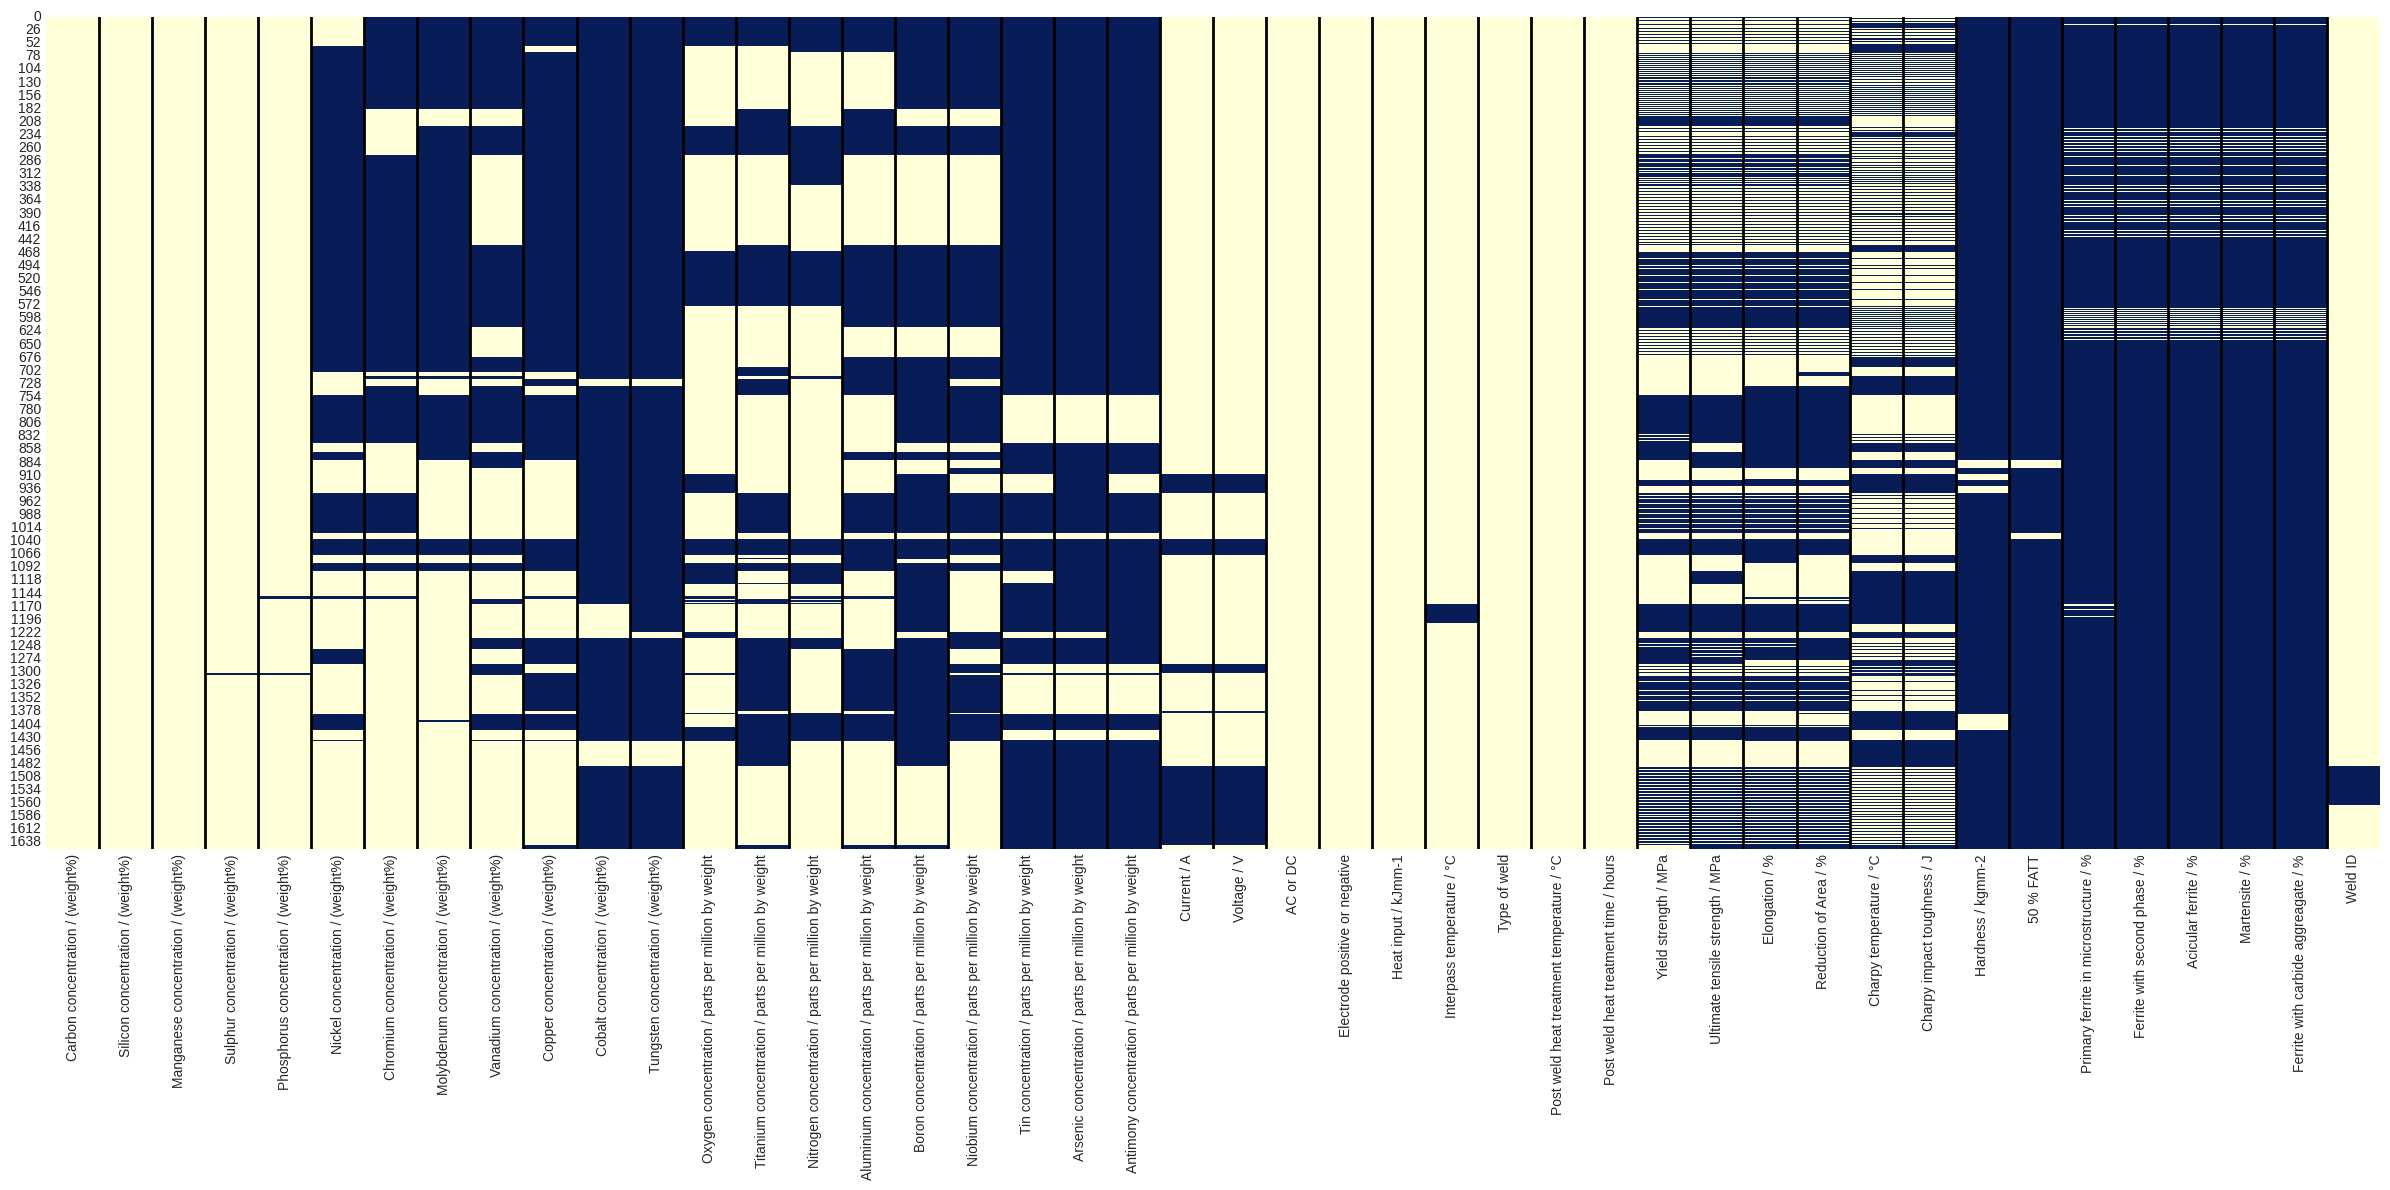

In [28]:
plot_missing_data_heatmap(data)

Carbon, Silicon, Manganese, Sulphur and Phospuros have almost zero Nans

Nickel, Chromium, Molybdneum, Vanadium and Copper have mainly missing values in the beggining of the dataset, and are correlated

Cobalt and Tugesten are almost full of Nans, and are correlated

Oxygen, Titanium, Nitrogen, Aluminium, Boron, and Niobium are also highly correlated, with more sparsed Nans values

Tim, Arsenic and Antimony as well

Current and Voltage are correlated, which makes sense

Yield Strength, Ultimate Tensile, Elongation, Reduction of area are also correlated

The last features are also with a lot of Nans, maybe we could just drop them

In [29]:
import missingno as msno
import matplotlib.pyplot as plt

def visualize_missing_data(df):
    """
    Visualizes missing data in a DataFrame using missingno heatmap, matrix, and dendrogram.

    - Heatmap: Shows correlation between missing values.
    - Matrix: Displays the missing values in the form of a bar.
    - Dendrogram: Shows clustering of missing values to indicate relationship between features.

    Conclusion: With these maps, it is likely that the missing data is not MNAR (Missing Not at Random).
    """
    # Plot heatmap: A value close to -1 means that if one variable is present, the other is likely missing.
    # A value close to 1 means if one is present, the other is likely present.
    plt.figure(figsize=(10, 6))
    msno.heatmap(df)
    plt.show()

    # Plot dendrogram: Correlation map, closer means more relation between features.
    # plt.figure(figsize=(10, 6))
    # msno.dendrogram(df)
    # plt.show()



<Figure size 1000x600 with 0 Axes>

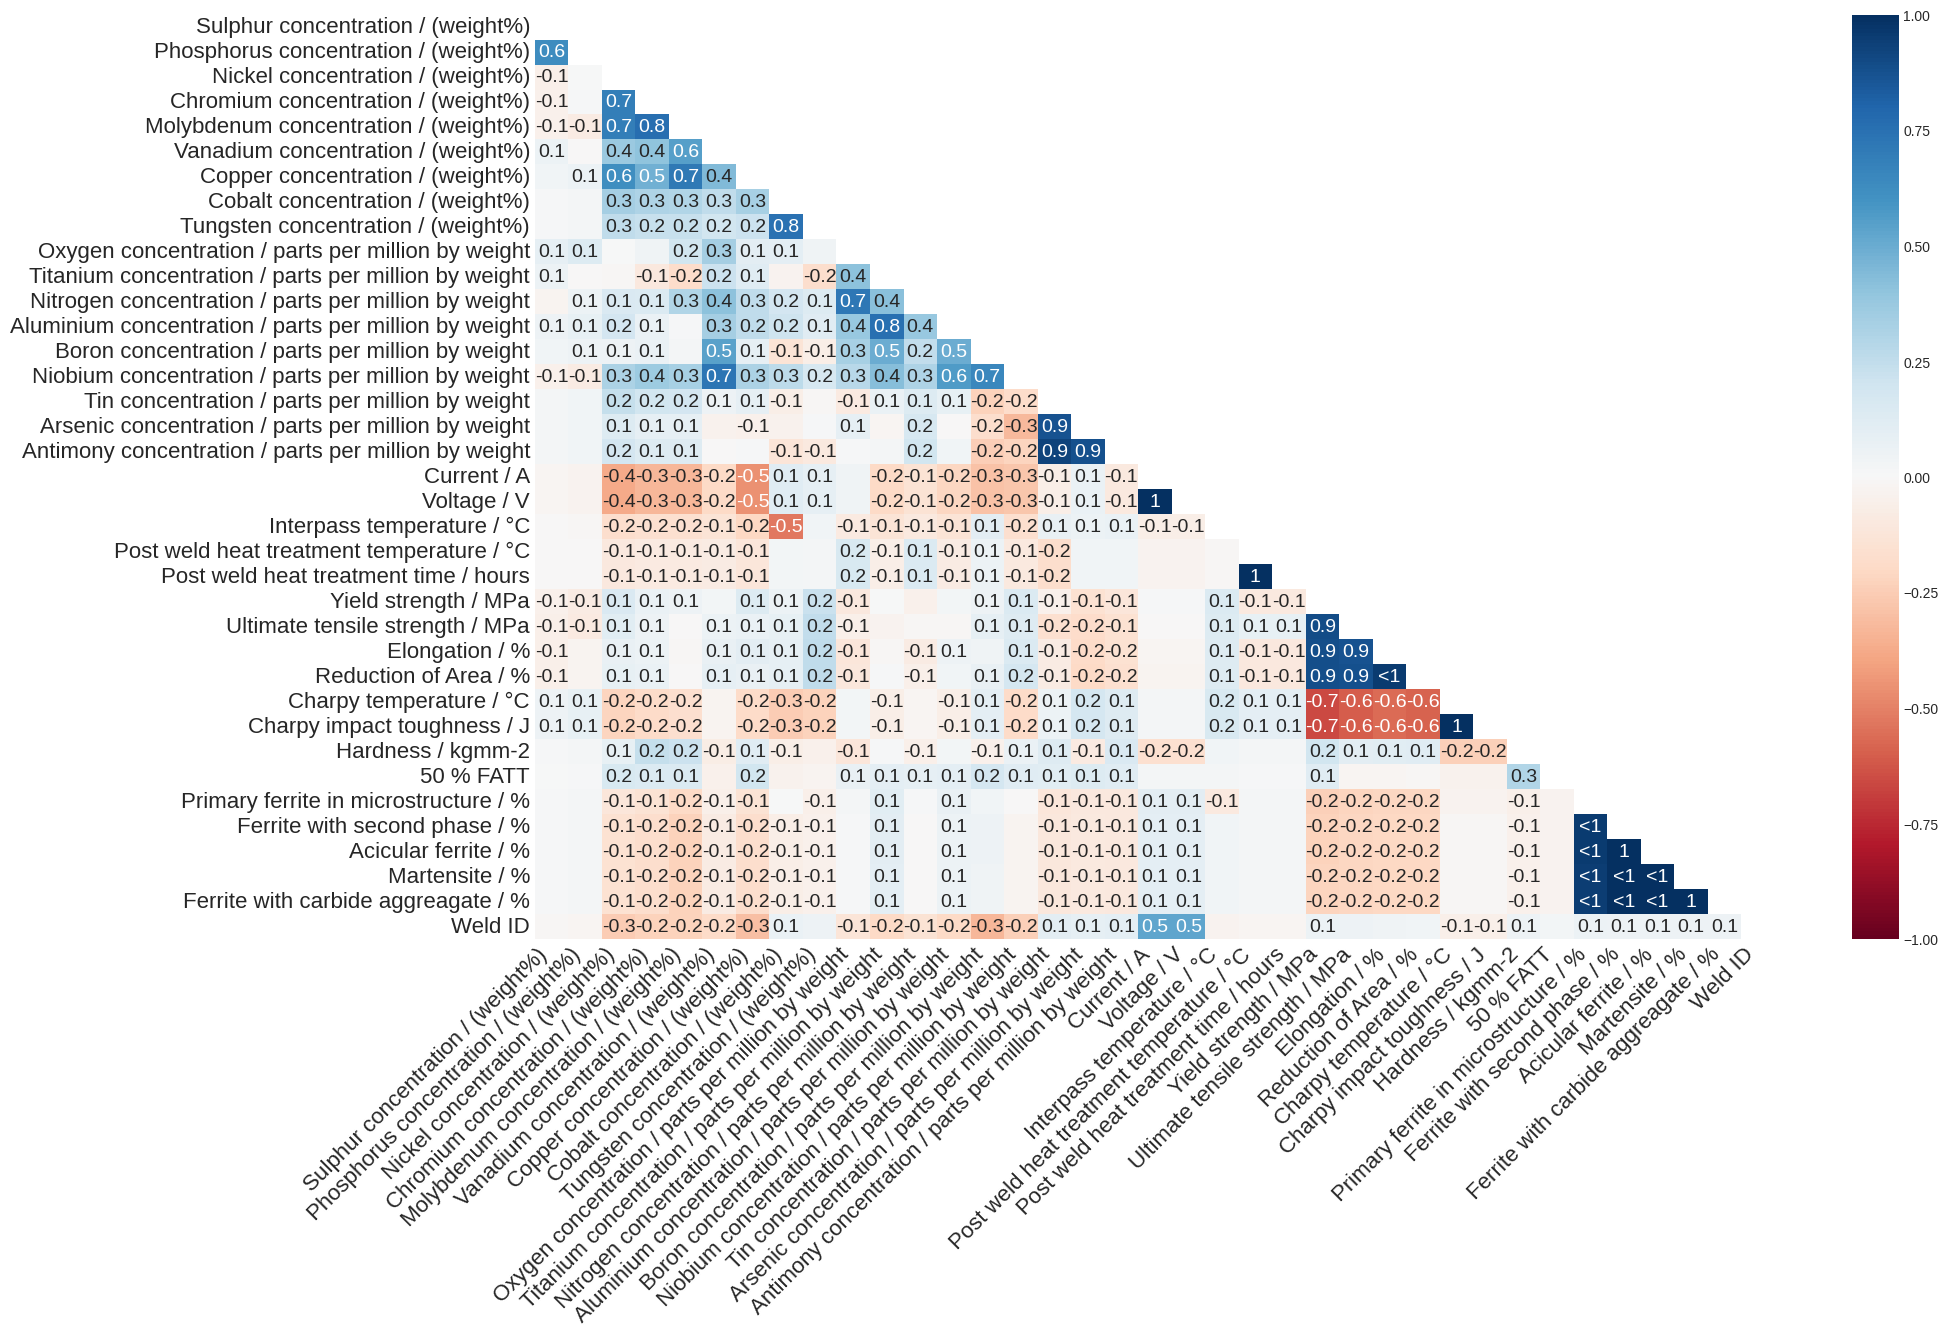

In [30]:
visualize_missing_data(data)

In [31]:
def little_test(df):
    df = df.copy()
    df_complete = df.dropna()

    # Dummy coding for missing data (missing = 1, observed = 0)
    missing_data = df.isnull().astype(int)

    # Chi-squared test for independence between missingness patterns and data
    observed_data = pd.concat([df_complete, missing_data], axis=1)
    chi2_stat = 0
    dof = 0
    for col in df.columns:
        if df[col].isnull().any():
            missing_col = f"{col}_missing"
            observed_data[missing_col] = missing_data[col]
            observed = pd.crosstab(observed_data[col], observed_data[missing_col])
            chi2, p, _, _ = stats.chi2_contingency(observed)
            chi2_stat += chi2
            dof += observed.size - observed.shape[0]

    # Returning the chi-square statistic and p-value
    return chi2_stat, stats.chi2.sf(chi2_stat, dof)

def verificar_mcar_por_feature(df):

    # Analisar MCAR para cada feature separadamente
    for feature in NUMERICAL_FEATURES:
        if df[feature].isnull().sum() == 0:
            print(f"\nA feature '{feature}' não possui valores faltantes, ignorada.")
            continue

        print(f"\nAnalisando a feature '{feature}'...")

        # Criar um subconjunto de dados com todas as outras colunas
        df_subset = df.copy()

        # Teste de Little para MCAR no subconjunto sem a própria feature
        print(df_subset.drop(columns=[feature]).columns)
        chi2_stat, p_value = little_test(df_subset.drop(columns=[feature]))

        # Exibir resultados do teste
        print(f"Resultado do Teste de Little para MCAR na feature '{feature}':")
        print(f"Estatística Qui-quadrado: {chi2_stat:.4f}")
        print(f"p-valor: {p_value:.4f}")

        if p_value > 0.05:
            print(f"Os dados de '{feature}' provavelmente são MCAR (não rejeita a hipótese nula).")
        else:
            print(f"Os dados de '{feature}' provavelmente não são MCAR (rejeita a hipótese nula).")



In [32]:
missing_data_results = verificar_mcar_por_feature(data)


A feature 'Carbon concentration / (weight%)' não possui valores faltantes, ignorada.

A feature 'Silicon concentration / (weight%)' não possui valores faltantes, ignorada.

A feature 'Manganese concentration / (weight%)' não possui valores faltantes, ignorada.

Analisando a feature 'Sulphur concentration / (weight%)'...
Index(['Carbon concentration / (weight%)', 'Silicon concentration / (weight%)',
       'Manganese concentration / (weight%)',
       'Phosphorus concentration / (weight%)',
       'Nickel concentration / (weight%)',
       'Chromium concentration / (weight%)',
       'Molybdenum concentration / (weight%)',
       'Vanadium concentration / (weight%)',
       'Copper concentration / (weight%)', 'Cobalt concentration / (weight%)',
       'Tungsten concentration / (weight%)',
       'Oxygen concentration / parts per million by weight',
       'Titanium concentration / parts per million by weight',
       'Nitrogen concentration / parts per million by weight',
       'Alumi

ValueError: Data must be 1-dimensional, got ndarray of shape (1652, 2) instead

Write here the conclusions

In [33]:
def verify_pct_of_categories(X_train,feature_names):
  total_samples=len(X_train)
  for feature in feature_names:
      temp_df=pd.Series(X_train[feature].value_counts()/total_samples)
      fig=temp_df.sort_values(ascending=False).plot.bar(color="#FFE680")
      fig.axhline(y=0.05,color='red')
      fig.set_ylabel(f'Percentual of {feature}')
      plt.show()

def get_categorical_variables(df):
    return df.select_dtypes(include='object').columns

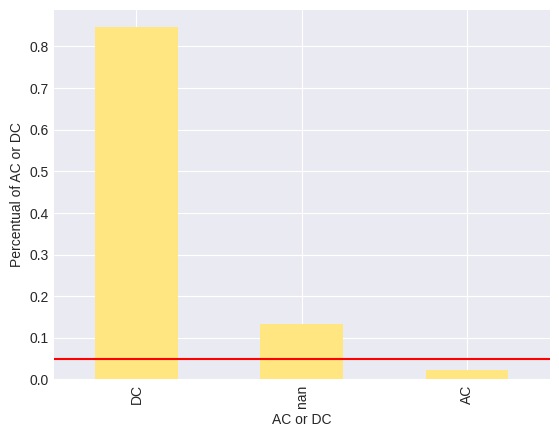

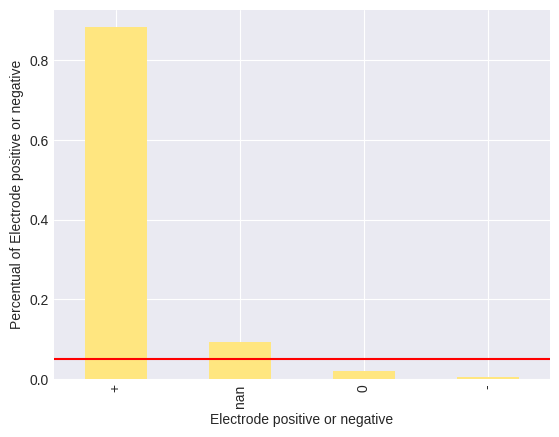

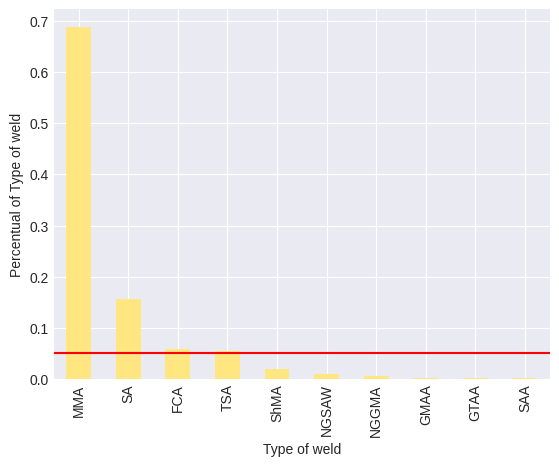

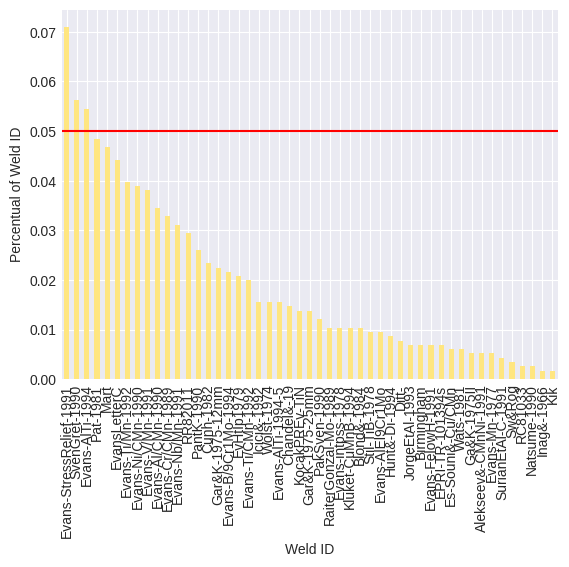

In [34]:
verify_pct_of_categories(X_train,get_categorical_variables(X_train))


In [35]:
def plot_categorical_relation(df, feature_1, feature_2, plot_type='heatmap'):

    contingency_table = pd.crosstab(df[feature_1], df[feature_2])

    if plot_type == 'heatmap':
        sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')
        plt.title(f'Heatmap: Relação entre {feature_1} e {feature_2}')
    elif plot_type == 'stacked_bar':
        contingency_table.plot(kind='bar', stacked=True)
        plt.title(f'Barras Empilhadas: Relação entre {feature_1} e {feature_2}')
    else:
        raise ValueError("O tipo de gráfico deve ser 'heatmap' ou 'stacked_bar'")

    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    plt.show()


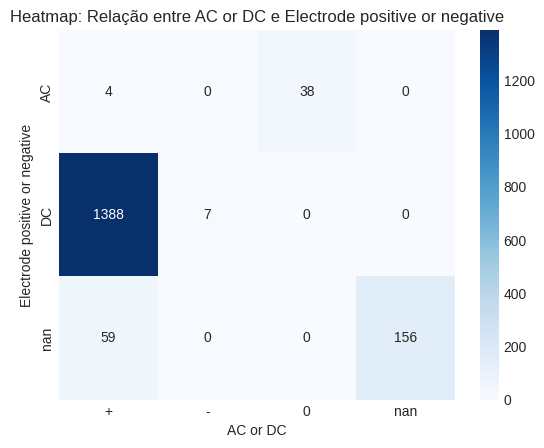

In [36]:
plot_categorical_relation(data, "AC or DC", "Electrode positive or negative")

In [37]:
def plot_nans_relation(df, categorical_feature, plot=True):

    df['nan_count'] = df.isna().sum(axis=1)

    nan_relation = df.groupby(categorical_feature)['nan_count'].mean().reset_index()

    if plot:
        sns.barplot(x=categorical_feature, y='nan_count', data=nan_relation, palette='Blues_d')
        plt.title(f'Média de NaNs por Categoria de {categorical_feature}')
        plt.ylabel('Média de NaNs por Linha')
        plt.xlabel(categorical_feature)
        plt.show()

    # return nan_relation

<ipython-input-37-8631c5baa036>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




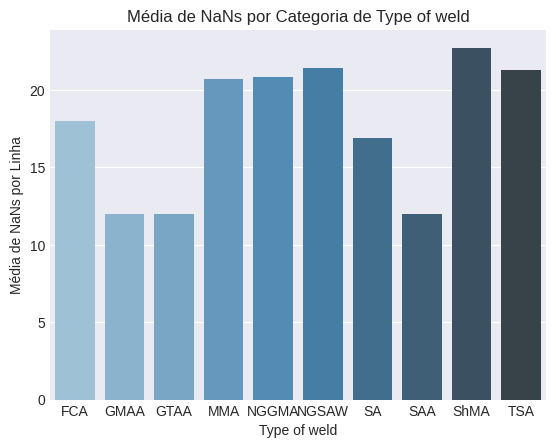

In [38]:
plot_nans_relation(data, "Type of weld")

Write here the conclusions

### Distribution of Numerical Variables


In [39]:
def diagnostic_plots(df,variable,lib):
  if lib=='plotly' or lib=='Plotly':
    fig=make_subplots(rows=1, cols=3,subplot_titles=('Histogram','QQ-Graph','Box-Plot'))
    fig_hist=ff.create_distplot([df[variable].values], [variable])
    fig.add_trace(go.Histogram(fig_hist['data'][0],
                              marker_color='#FFCC00',
                              ), row=1, col=1)

    fig.add_trace(go.Scatter(fig_hist['data'][1],
                         line=dict(color='#FF851B')
                        ), row=1, col=1)
    qq = stats.probplot(df[variable], dist='norm', sparams=(1))
    x = np.array([qq[0][0][0], qq[0][0][-1]])
    qq_df=pd.DataFrame({'x':np.array(qq[0][0].tolist()),
                    'y':np.array(qq[0][1].tolist()),
                    'index':df.index.tolist()},index=None)
    fig_qq=go.Scatter(x=qq_df['x'],
                            y=qq_df['y'],
                            mode='markers',
                            name=variable,
                            text=qq_df['index'],
                            marker_color='rgba(31, 150, 139, 0.9)')

    fig_qq.update(mode='markers', marker_line_width=0.15, marker_size=5)
    fig.append_trace(fig_qq, row=1, col=2)
    fig.append_trace(go.Scatter(x=x,
                                y=qq[1][1] + qq[1][0]*x,
                                mode='lines',
                                name='Normal',
                                marker_color='rgba(255, 90, 0, 0.9)'), row=1, col=2)
    fig.layout.update(title='Variable Resume '+ variable)
    fig_box=go.Box(y=df[variable],
                  boxpoints='all',
                  jitter=0.4, # add some jitter for a better separation between points
                  boxmean='sd',
                  text=df.index.tolist(),
                  name='Box-Plot',
                  marker_color='#FFCC00',
                  line_color='#FF851B')
    fig.append_trace(fig_box, row=1, col=3)
    fig.show()

  elif lib=='matplotlib' or lib=='pyplot':
    #function takes a dataframe (df) and
    # the variable of interest as arguments
    if not df[variable].isna().all():

      # define figure size
      plt.figure(figsize=(16, 4))

      # histogram
      plt.subplot(1, 3, 1)
      sns.histplot(data=df[variable].dropna().to_numpy(), kde=True, color='#E0B100', stat="density")
      plt.title('Histogram')

      # Q-Q plot
      ax=plt.subplot(1, 3, 2)
      stats.probplot(df[variable], dist="norm", plot=plt)
      ax.get_lines()[0].set_markersize(7.0)
      ax.get_lines()[0].set_markerfacecolor('#44B1A5')
      ax.get_lines()[0].set_color('#44B1A5')

      ax.get_lines()[1].set_markerfacecolor('#FF7627')
      plt.ylabel('RM quantiles')

      # boxplot
      plt.subplot(1, 3, 3)
      sns.boxplot(y=variable, data=df,color='#FFCC00',linewidth=2.5)
      sns.swarmplot(y=variable, data=df.iloc[0:300], color="#FFE680", size=4)
      plt.title('Boxplot')

      plt.suptitle('Distribution of '+ variable, fontsize=16)
      plt.show()

    else:
      print('Choose lib equals to "matplotlib" ou "plotly"!')

def get_numerical_variables(df):
    return df.select_dtypes(exclude='object').columns


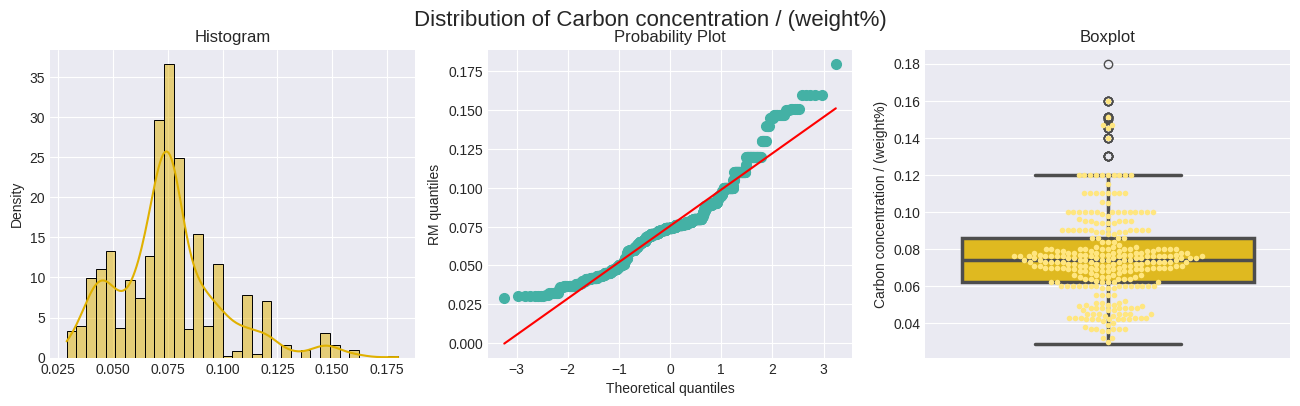

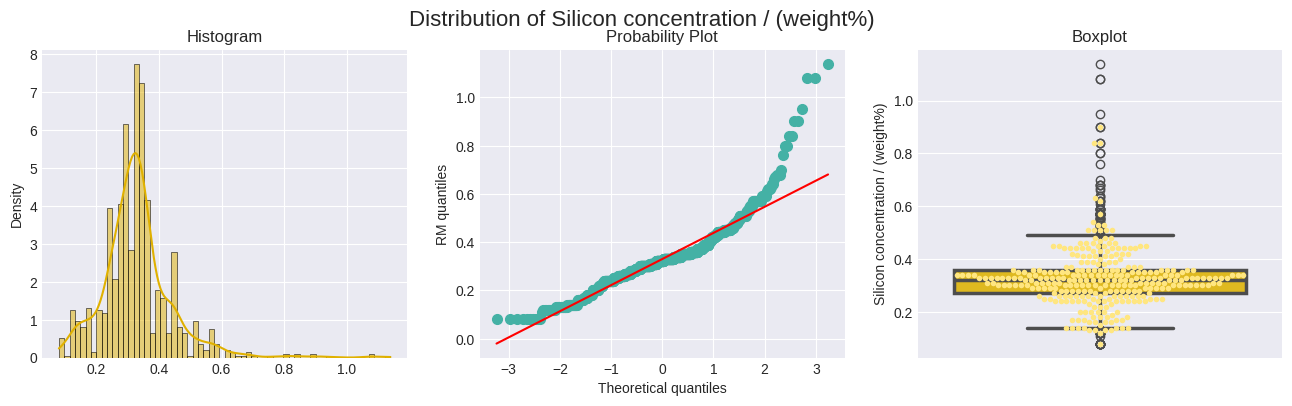

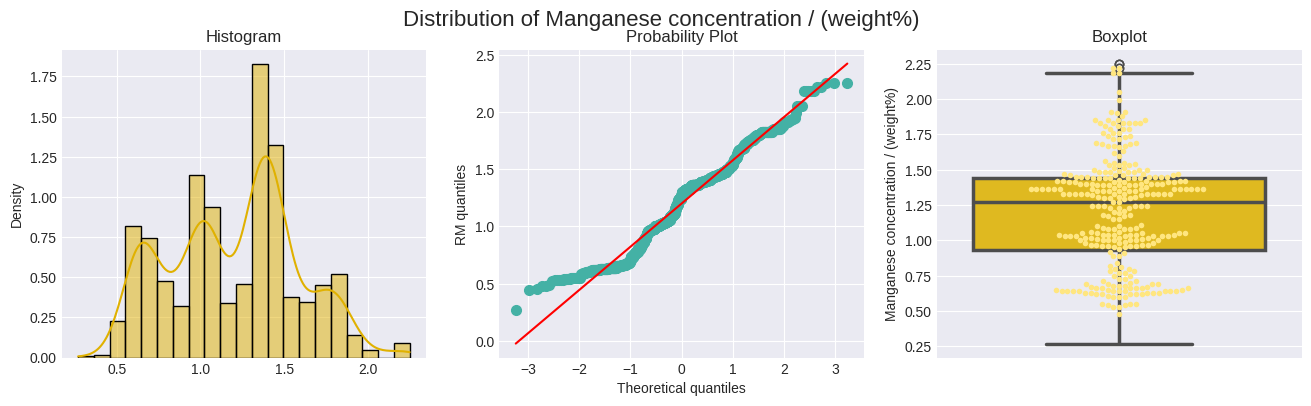

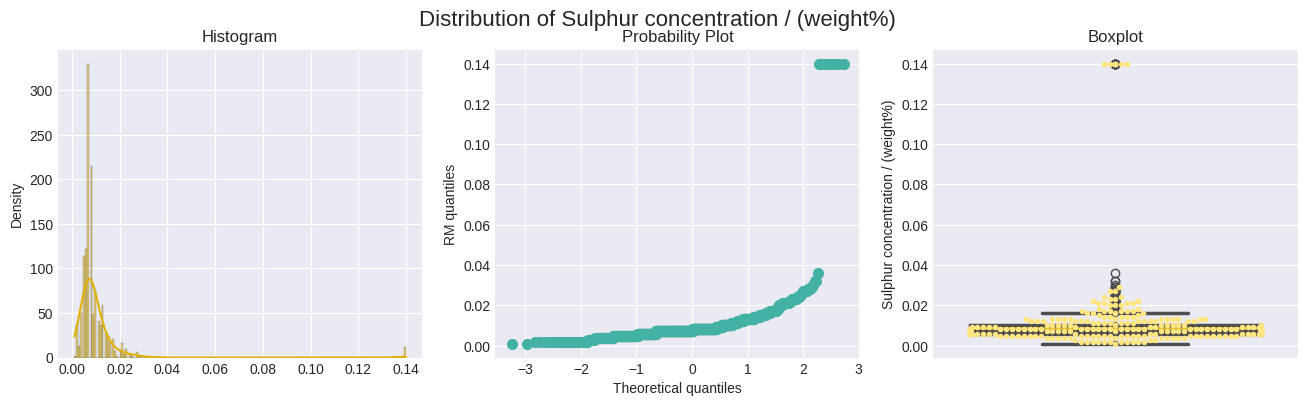

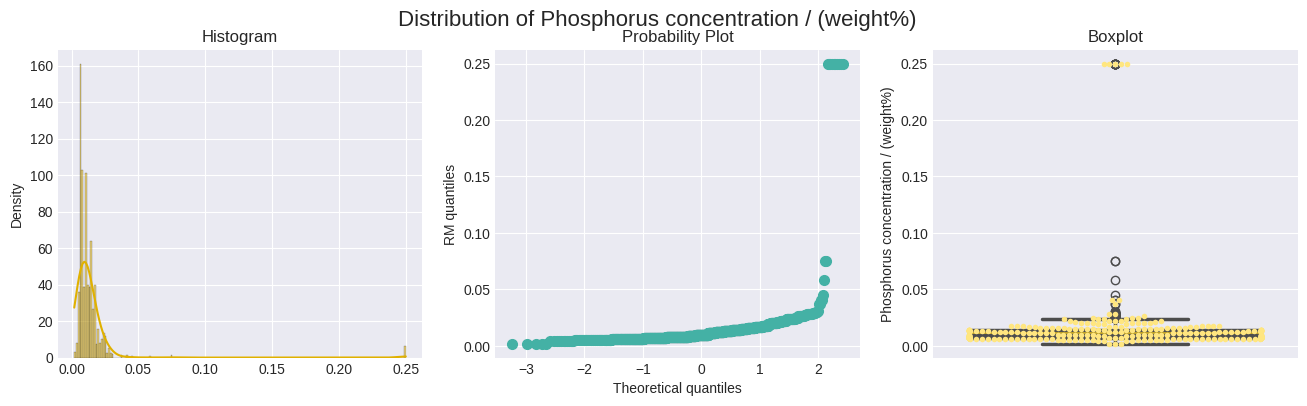

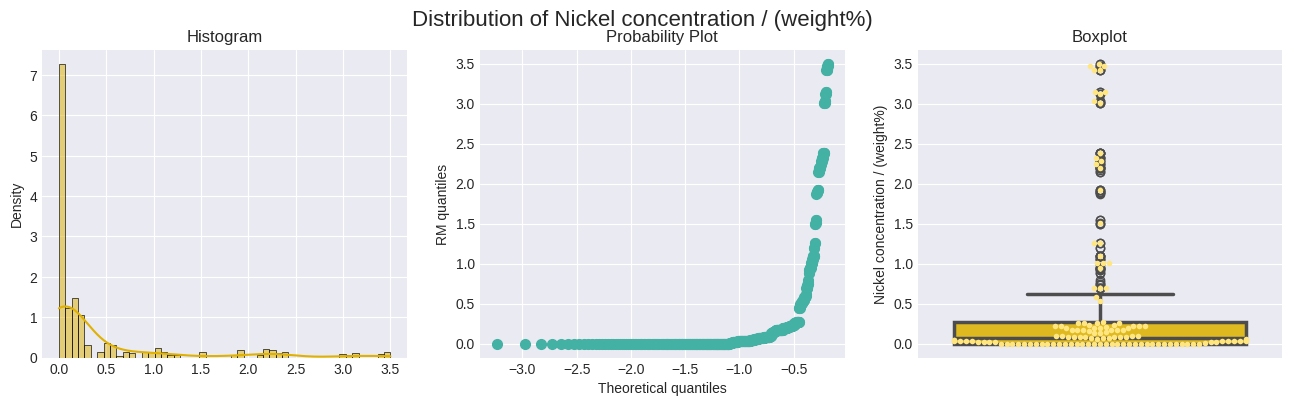

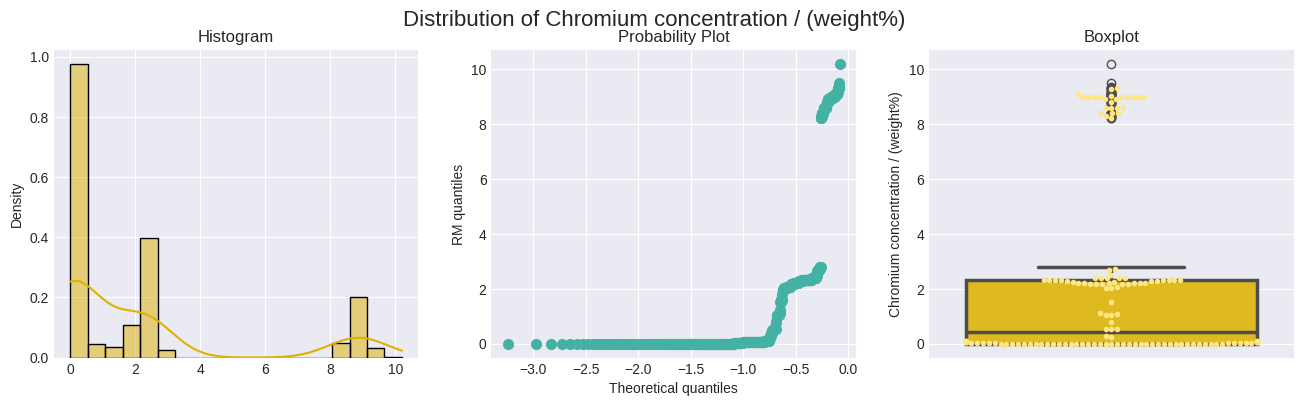

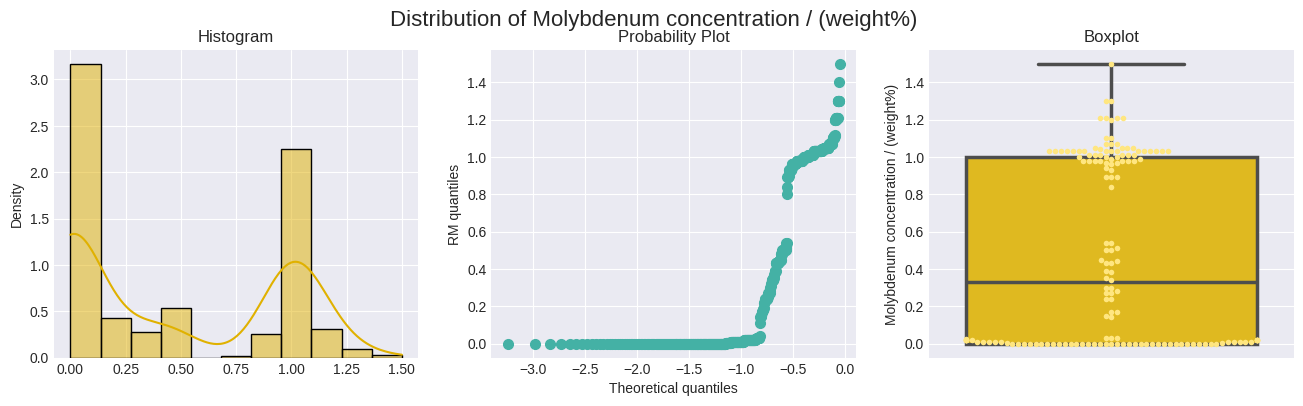

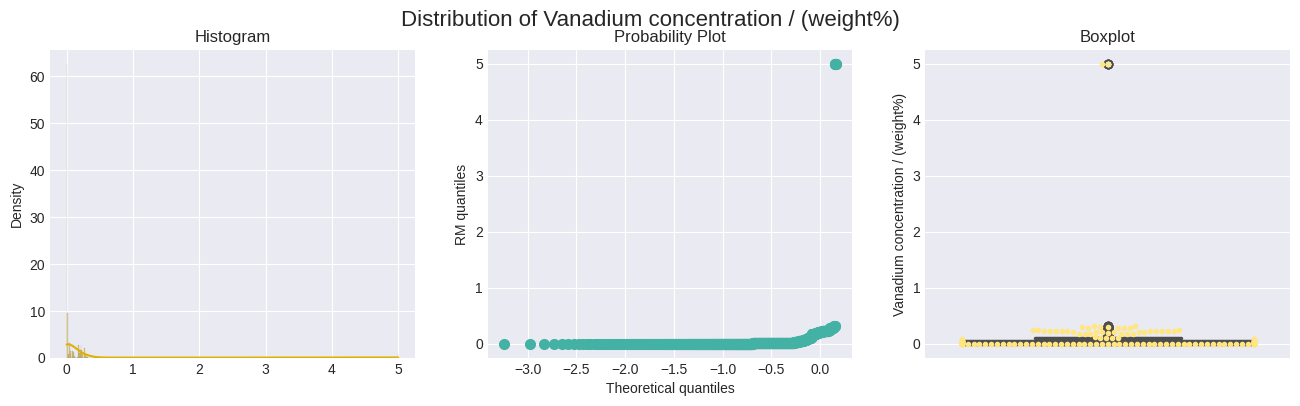

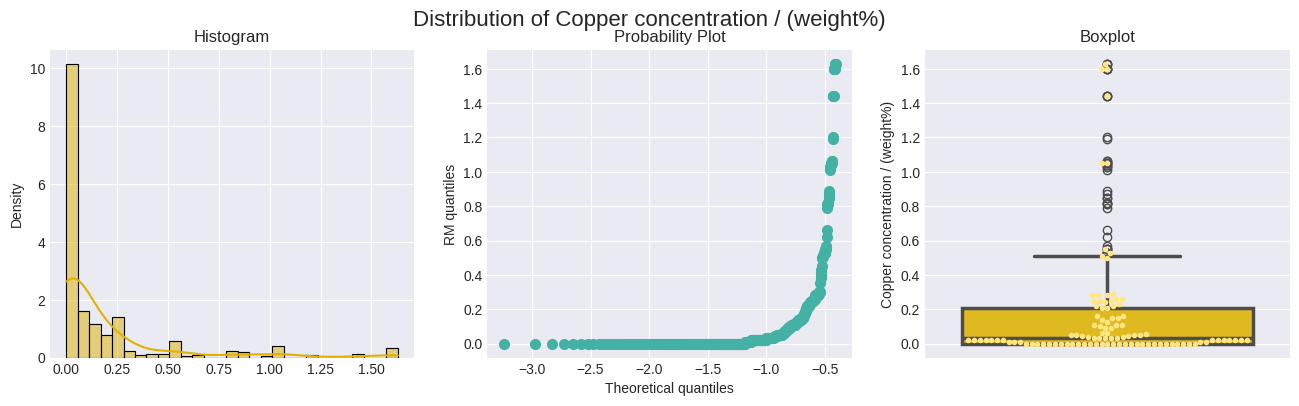

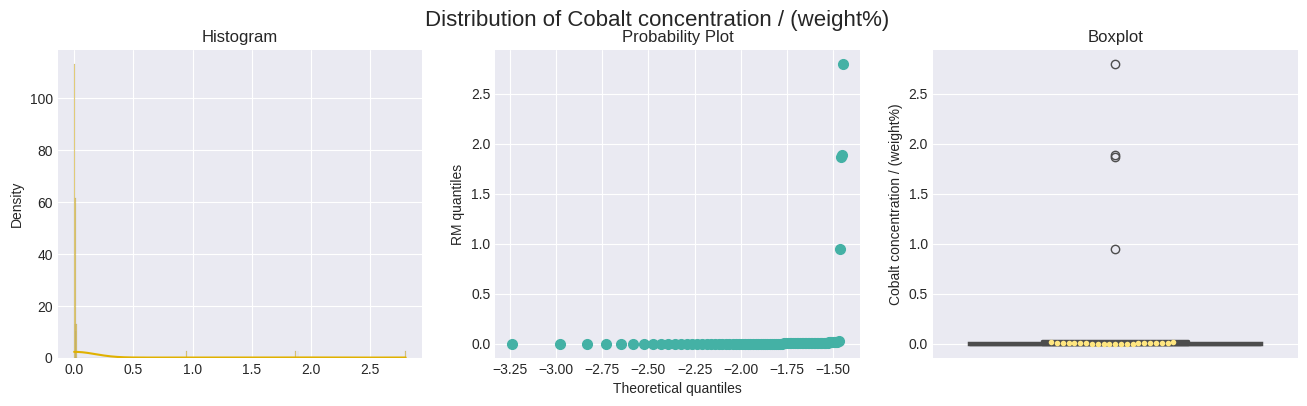

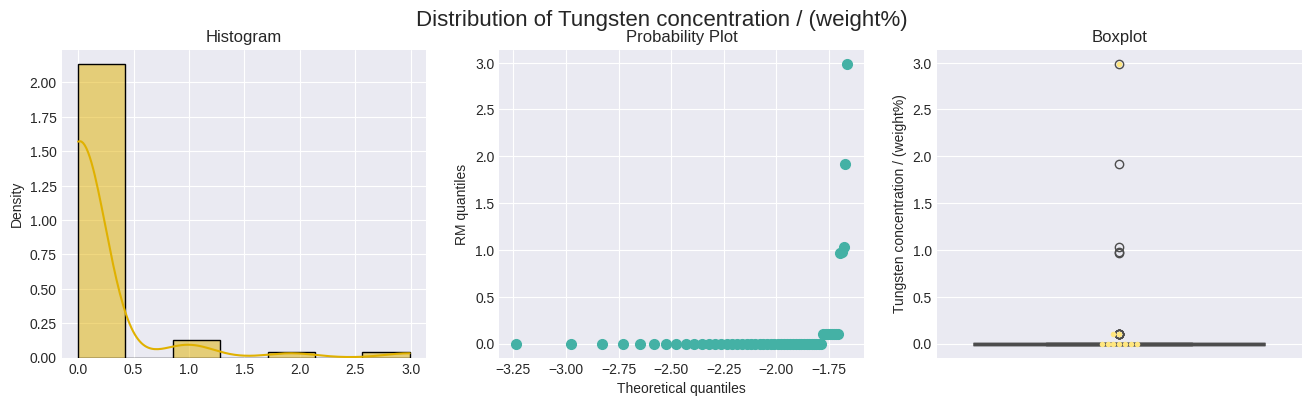

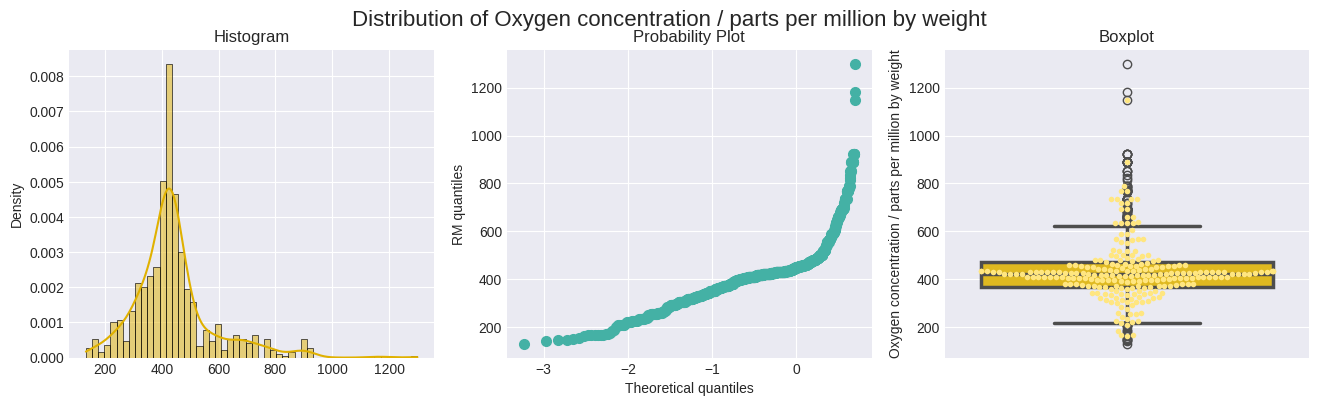

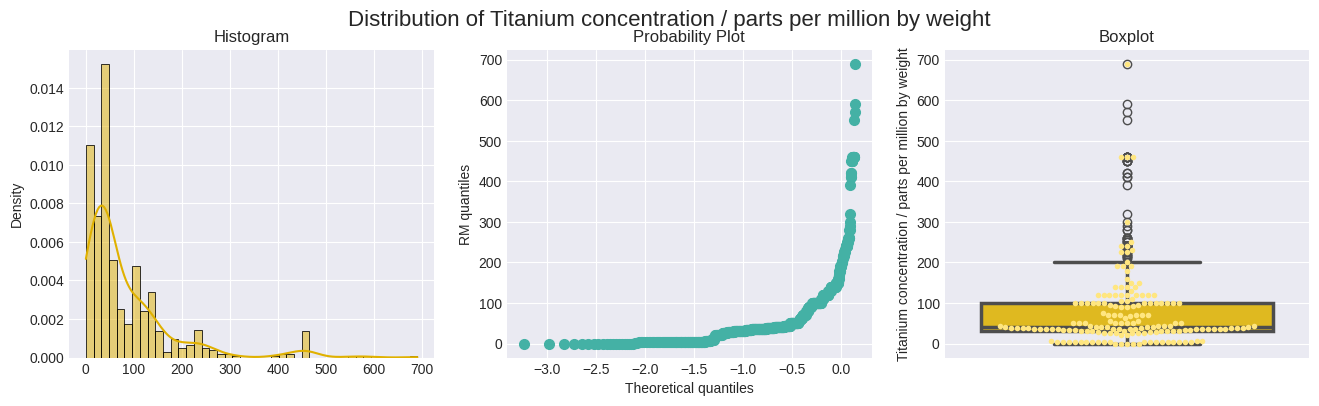

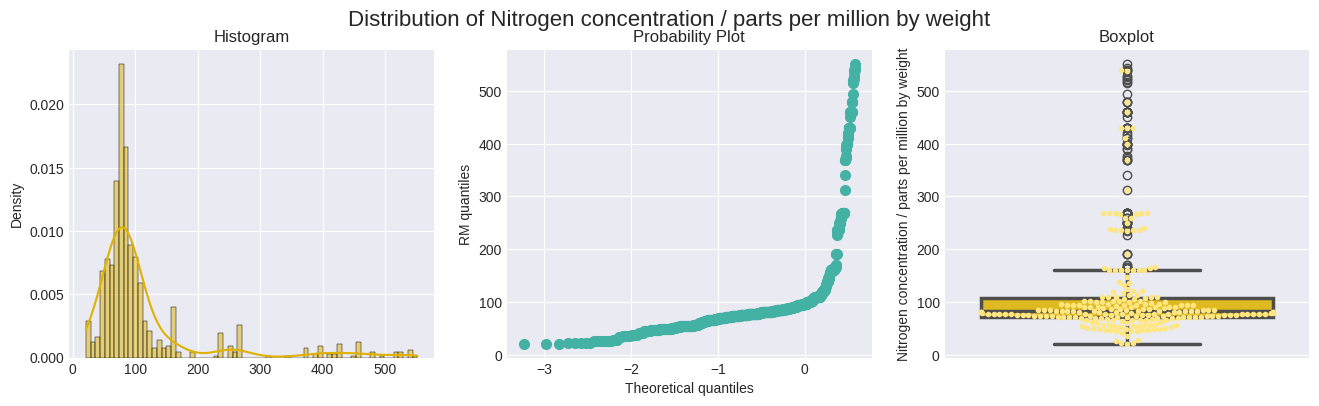

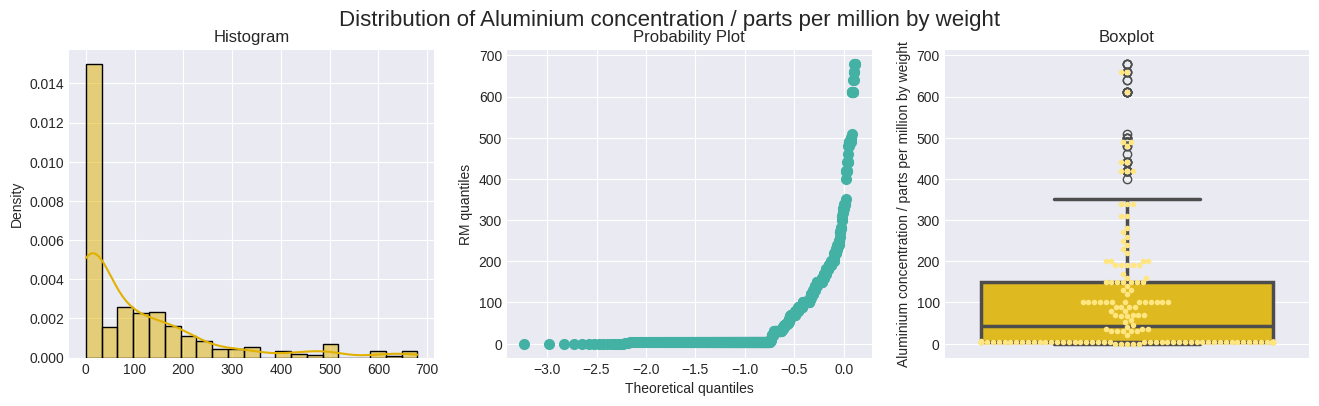

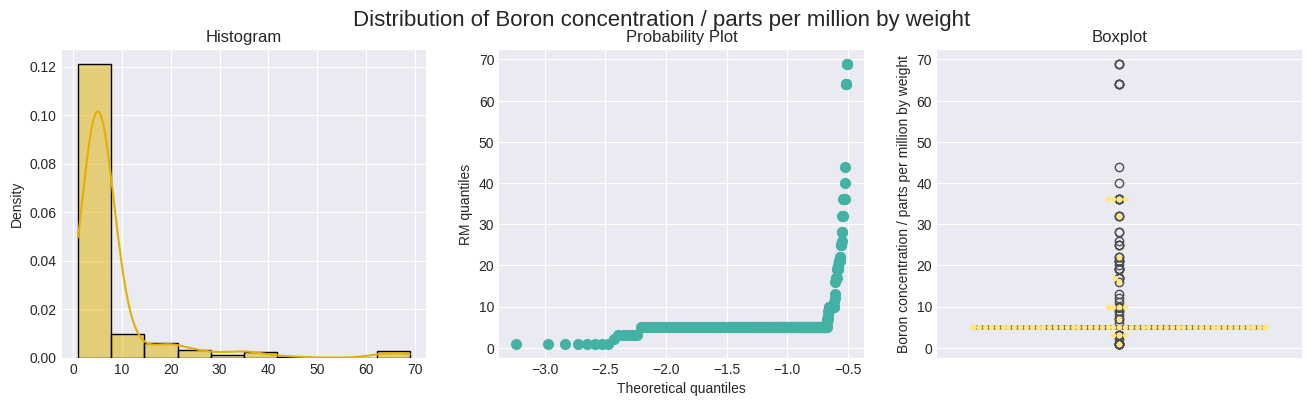

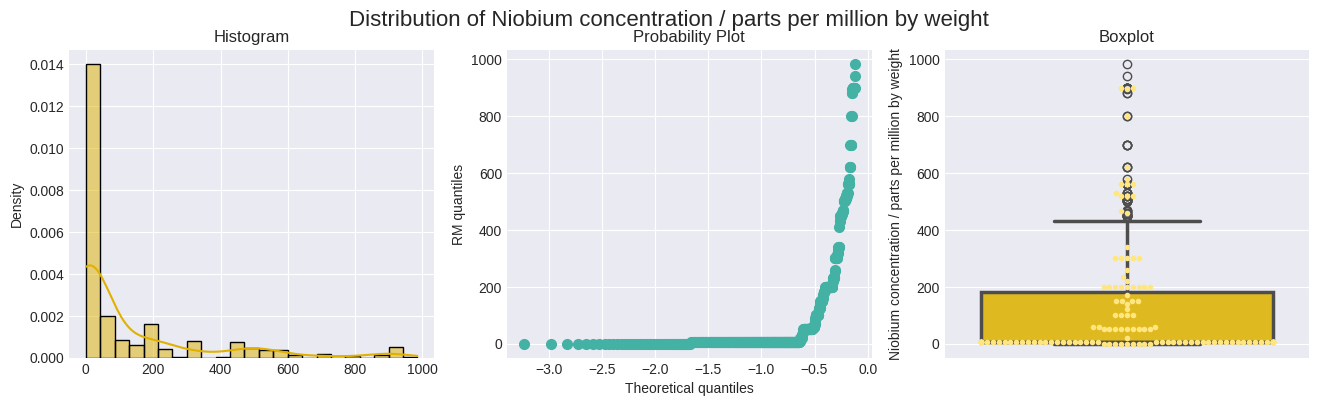

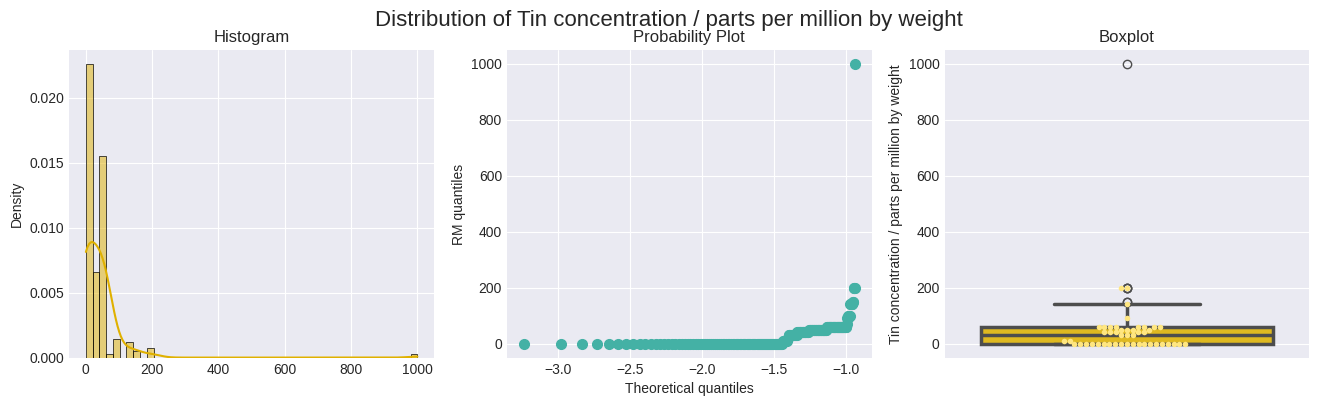

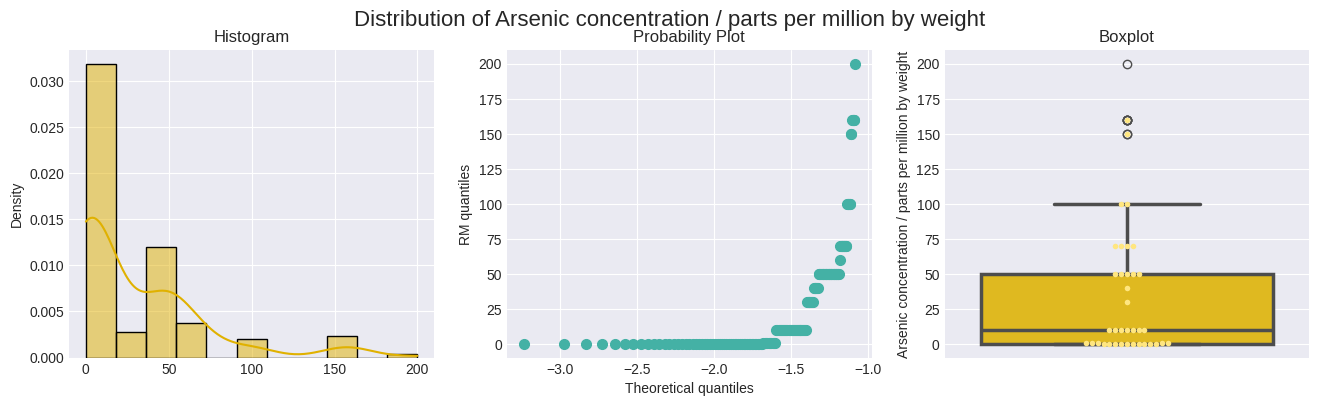

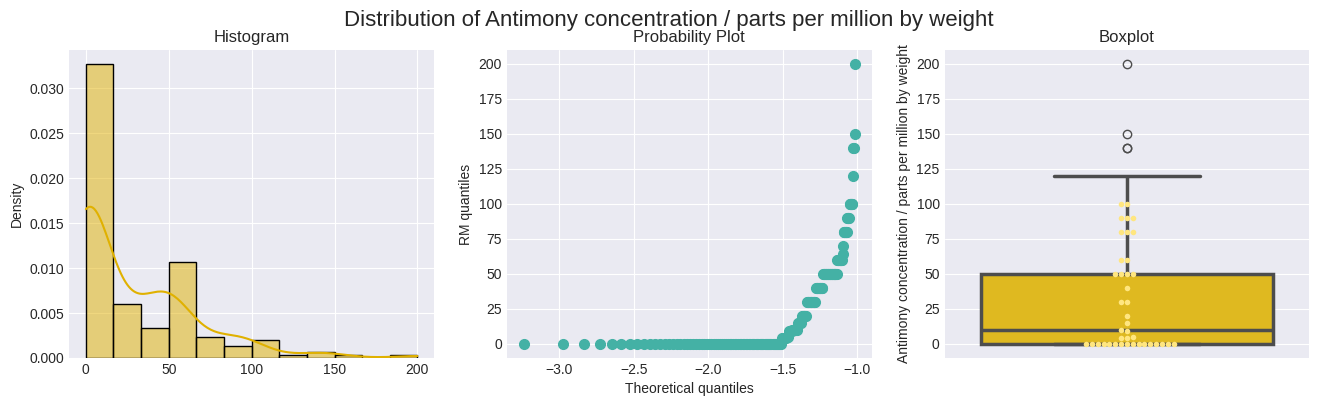

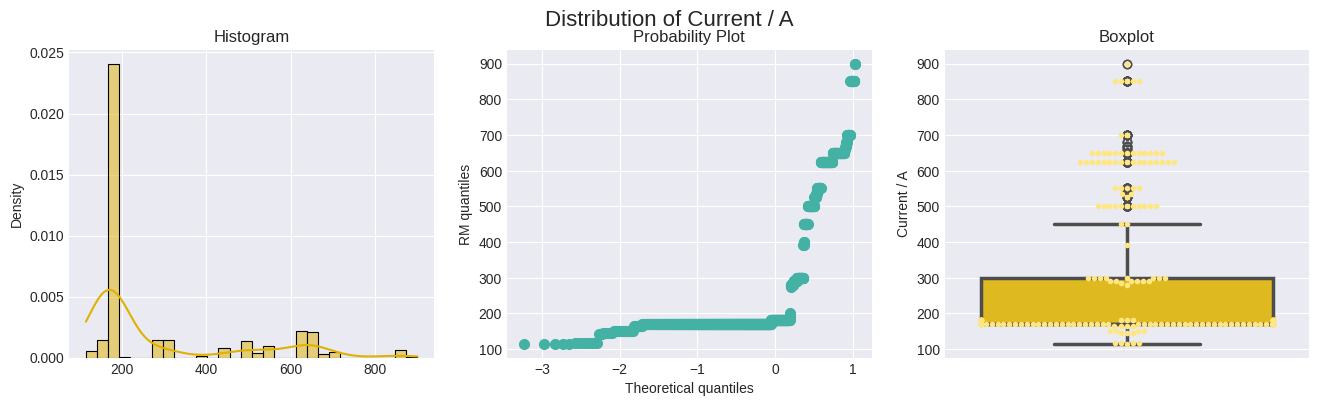

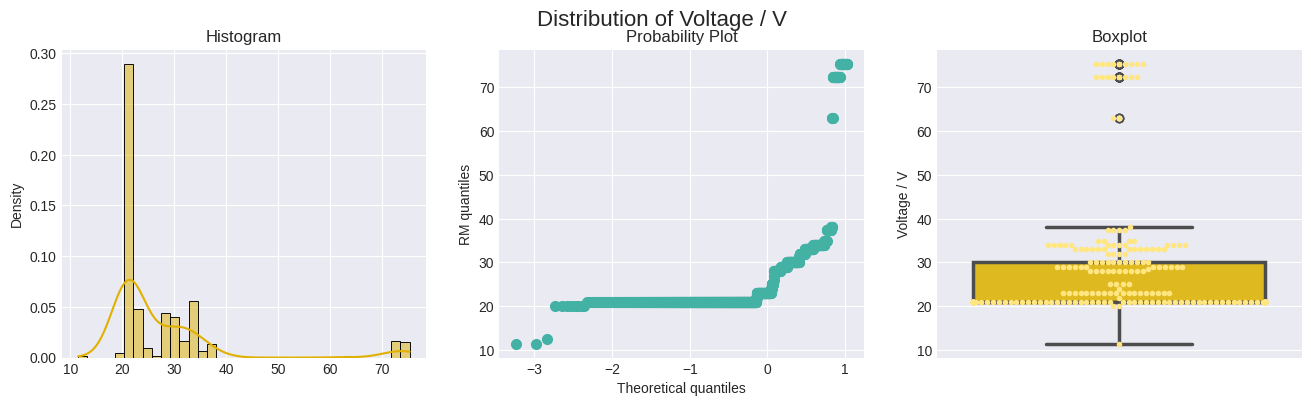

In [ ]:
for feature in get_numerical_variables(X_train):
  diagnostic_plots(X_train,feature,'matplotlib')

Write here the conclusions